# Equivalence Class Transformation Vertical Apriori 

- use vertical data format
- dfs based 
- Each item is stored with its T_ID(Transaction id)
- uses intersection based approach to compute the support an itemset.

![](photo1.jpeg)

![](p1.png)

![](p2.png)

# Code Bits

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('Market_Basket_Optimisation.csv')

In [3]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Relative Frequency'}>

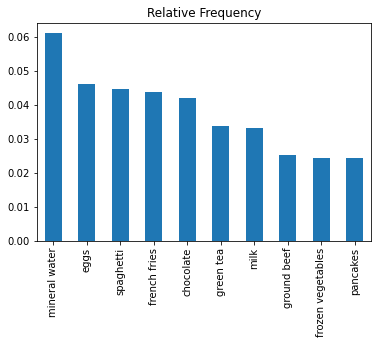

In [4]:
# Visualising items' frequencies
df.stack().value_counts(normalize=True)[:10].plot(kind='bar', title='Relative Frequency')

<AxesSubplot:title={'center':'Frequency'}>

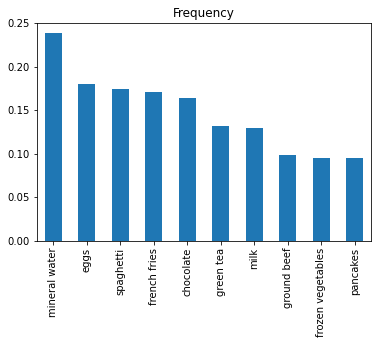

In [5]:
# frequency 
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar', title='Frequency') 

In [6]:
# Formatting the dataset
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

In [7]:
transactions[:10]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food']]

In [8]:
df.head(3)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
! pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=36b46dd4bdb932d8ddc74e38497f7c8ab973d064cecb152f2acf96fd58ce846d
  Stored in directory: c:\users\devarshi shah\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [11]:
# Building the model
from apyori import apriori
rules = apriori(transactions=transactions, 
                min_support=0.004, # how frequent is your item(s) in the dataset
                min_length=2, 
                max_length=0)
results = list(rules)

In [12]:
# Organizing the model's output
def inspect(results):
    item_sets = []
    supports = [] 
    for result in results:
        item_sets.append(tuple(result[0]))
        supports.append(result[1])
    return list(zip(item_sets, supports))
results_df = pd.DataFrame(inspect(results),
                        columns = ['Item Set', 'Support'])

support({milk,eggs})
- it means; transactions {milk,eggs} / transactions

In [13]:
# Organizing the model's output
def inspect(results):
    item_sets = []
    supports = [] 
    for result in results:
        item_sets.append(tuple(result[0]))
        supports.append(result[1])
    return list(zip(item_sets, supports)) # zip: It is used to map the similar index of multiple containers so that they can be used just using a single entity
results_df = pd.DataFrame(inspect(results),
                        columns = ['Item Set', 'Support'])

In [14]:
pd.set_option('display.max_rows', df.shape[0])
results_df.sort_values('Support', ascending=False)[:25]

,Item Set,Support
69,"(mineral water,)",0.238267
34,"(eggs,)",0.179733
96,"(spaghetti,)",0.174133
40,"(french fries,)",0.170933
23,"(chocolate,)",0.163867
51,"(green tea,)",0.132000
68,"(milk,)",0.129600
52,"(ground beef,)",0.098267
46,"(frozen vegetables,)",0.095333
78,"(pancakes,)",0.095067


## Now the itemset trio and having support>0.004 has more than 70% confidence.